## K-Means Clustering

### Find Closest Centroids

In [51]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

### Load dataset

In [7]:
data = loadmat("ex7data2.mat")

X = data['X']

print(f'Data : \n {X[:10,:]}')

Data : 
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]
 [1.24792268 4.93267846]
 [1.97619886 4.43489674]
 [2.23454135 5.05547168]
 [2.98340757 4.84046406]
 [2.97970391 4.80671081]]


In [22]:
def findClosestCentroids(X, centroids):
    
    K = len(centroids)   # number of centroids
    idx = np.zeros((len(X),1))
    
    for i in range(len(X)):
        idx[i] = np.argmin(np.sum((X[i,:] - centroids) ** 2, 1))
    
    return idx

In [24]:
initial_centroids = np.asarray([[3,3], [6,2], [8,5]])

idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples: \n')
print(f'{idx[:3]}')
print('\n(the closest centroids should be 0, 2, 1 respectively)\n')

Closest centroids for the first 3 examples: 

[[0.]
 [2.]
 [1.]]

(the closest centroids should be 0, 2, 1 respectively)



### Compute Means

In [49]:
def computeCentroids(X, idx, K):
    
    # return this
    centroids = np.zeros((K,2))
    n = X.shape[1]
    
    for i in range(K):
        cluster_indices = np.where(idx==i)
        cluster = X[cluster_indices[0]]
        
        centroids[i,:] = np.sum(cluster, 0)/cluster.shape[0]
    
    return centroids
        
        

In [50]:
print('\nComputing centroids means.\n\n')

centroids = computeCentroids(X, idx, 3)

print('Centroids computed after initial finding of closest centroids: \n')
print(f' {centroids} \n')
print('\n(the centroids should be\n')
print('   [ 2.428301 3.157924 ]\n')
print('   [ 5.813503 2.633656 ]\n')
print('   [ 7.119387 3.616684 ]\n\n')


Computing centroids means.


Centroids computed after initial finding of closest centroids: 

 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]] 


(the centroids should be

   [ 2.428301 3.157924 ]

   [ 5.813503 2.633656 ]

   [ 7.119387 3.616684 ]




### K-Means Clustering

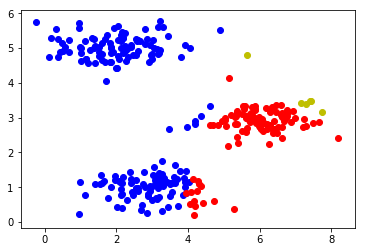

In [59]:
def plotData(X, idx, centroids):
    
    c = ['b', 'r', 'y']
    for i in range(centroids.shape[0]):
        cluster_indices = np.where(idx==i)
        cluster = X[cluster_indices[0]]
    
        plt.scatter(cluster[:,0], cluster[:,1], c=c[i])
    plt.show()

plotData(X, idx, initial_centroids)

In [60]:
def runkMeans(X, initial_centroids, max_iters, plot_progress=True):
    m = X.shape[0]
    
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    
    for i in range(max_iters):
        
        print(f'K-Means iteration {i+1}/{max_iters+1}')
        
        idx = findClosestCentroids(X, centroids)
        
        if plot_progress:
            
            plotData(X, idx, centroids)
            
        centroids = computeCentroids(X, idx, K)
    
    return centroids, idx      


Running K-Means clustering on example dataset.


K-Means iteration 1/11


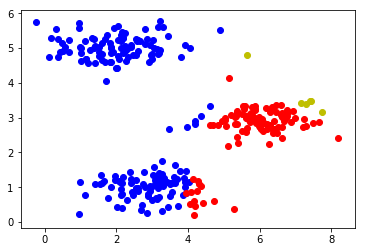

K-Means iteration 2/11


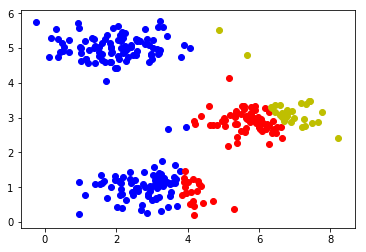

K-Means iteration 3/11


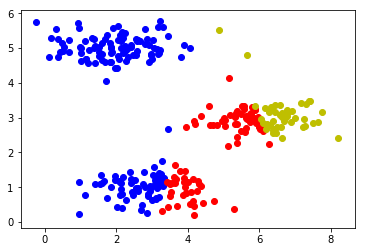

K-Means iteration 4/11


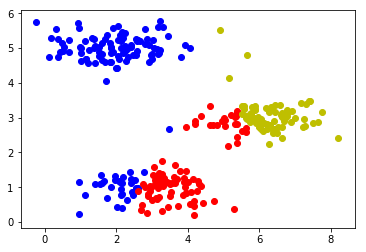

K-Means iteration 5/11


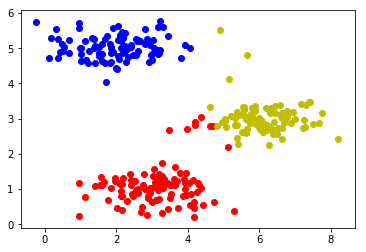

K-Means iteration 6/11


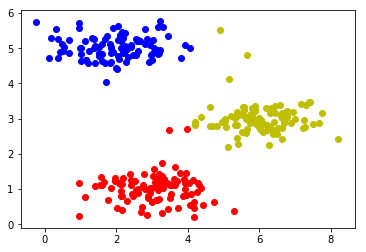

K-Means iteration 7/11


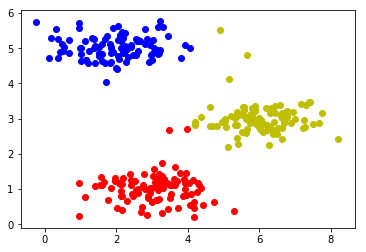

K-Means iteration 8/11


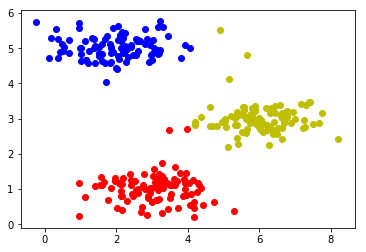

K-Means iteration 9/11


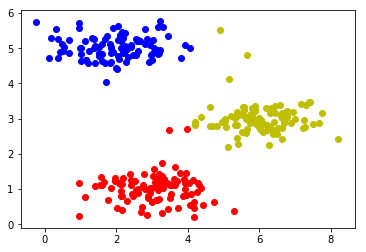

K-Means iteration 10/11


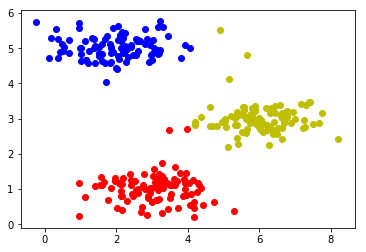


K-Means Done.




In [62]:
print('\nRunning K-Means clustering on example dataset.\n\n')

[centroids, idx] = runkMeans(X, initial_centroids, 10, True);
print('\nK-Means Done.\n\n')

<Figure size 432x288 with 0 Axes>